In [94]:
import seabreeze
seabreeze.use('pyseabreeze')
import seabreeze.spectrometers as sb
import pandas as pd
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt


In [95]:
devices = sb.list_devices()
spec = sb.Spectrometer(devices[0])

In [96]:
intensities = spec.intensities()
wavelengths = spec.wavelengths()
print(len(intensities), len(wavelengths))

2048 2048


In [97]:
dframe = pd.DataFrame(intensities, index=wavelengths, columns=['Intensity'])

In [98]:
dframe.head()

,Intensity
179.820000,0
180.191973,167
180.563919,164
180.935839,169
181.307733,167


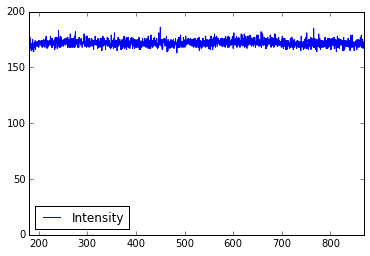

In [99]:
%matplotlib inline
dframe.plot()

In [120]:
def plot_intensity(spec):
    intensities = spec.intensities()
    wavelengths = spec.wavelengths()
    dframe = pd.DataFrame(intensities, index=wavelengths, columns=['Intensity'])
    dframe.plot()
    return intensities, wavelengths

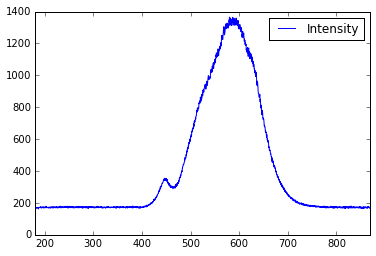

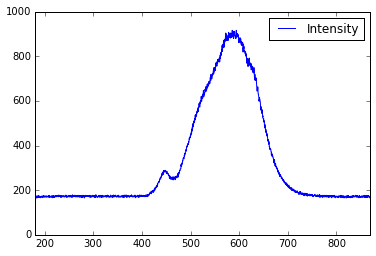

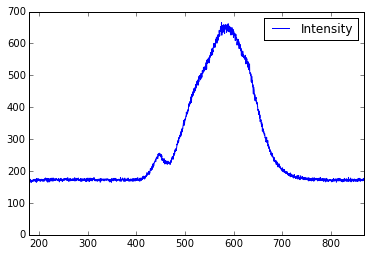

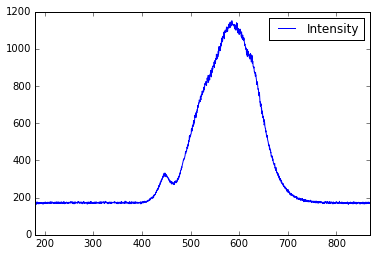

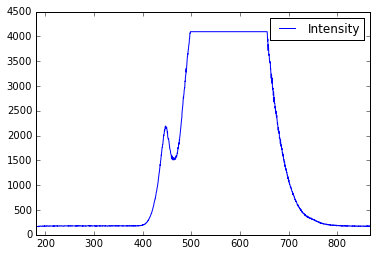

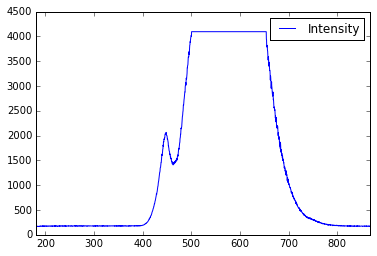

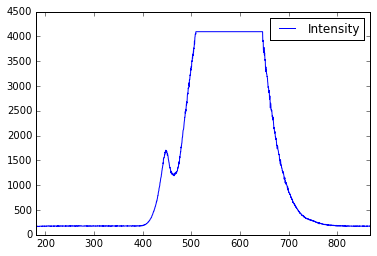

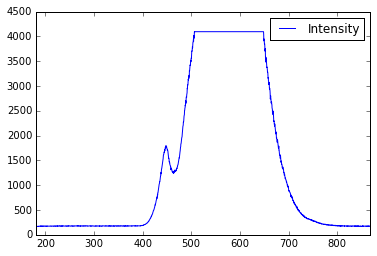

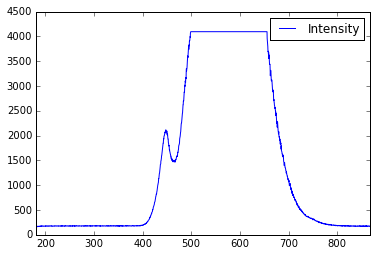

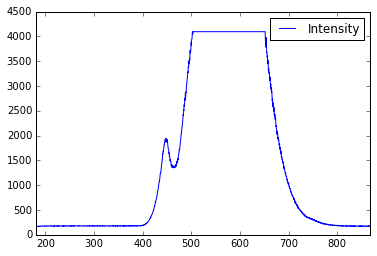

In [103]:
spec.integration_time_micros(3000)
time.sleep(5)
for i in range(10):
    time.sleep(0.4)
    

[(492.0, 456.44491156719874),
 (492.0, 457.83701377746377),
 (490.0, 454.70397461229737)]

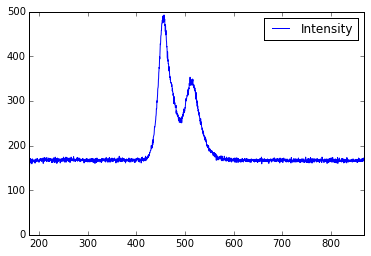

In [150]:
i, w = plot_intensity(spec)
pairs = [(i[j], w[j]) for j in range(len(i))]

pairs.sort(key=lambda x: x[0], reverse=True)

highest_intensities = pairs[:3]
highest_intensities


In [156]:
green = [(3432.0, 514.06587598080591),
 (3421.0, 513.3819689575206),
 (3405.0, 515.09145097057285)]
green = np.array(green)

red = [(4095.0, 624.0924001269774),
 (4095.0, 624.42113151831904),
 (4095.0, 624.74982070362103)]
red = np.array(red)

blue = [(492.0, 456.44491156719874),
 (492.0, 457.83701377746377),
 (490.0, 454.70397461229737)]
blue = np.array(blue)

green = green.mean(axis=0)
red = red.mean(axis=0)
blue = blue.mean(axis=0)

red, green, blue

(array([ 4095.        ,   624.42111745]),
 array([ 3419.33333333,   514.1797653 ]),
 array([ 491.33333333,  456.32863332]))

In [221]:
def rgb2hex(rgb):
    return '#' + "".join([hex(c)[2:].zfill(2) for c in rgb])

rgb2hex((255,137,68))

'#ff8944'

In [204]:
MAX_INTENSITY = 4096
MAX_RGB = 255
INTRGB_RATIO = 1/MAX_INTENSITY*MAX_RGB
WAVEBOXCAR= 10

gval=(green[0])* INTRGB_RATIO
rval=(red[0])* INTRGB_RATIO
bval=(blue[0])* INTRGB_RATIO

rgbval = (int(rval), int(gval), int(bval))
rgbval

rgbhex = rgb2hex(rgbval)

rgbhex

'fed41e'

In [206]:
%matplotlib inline
def show_color(color):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    rect1 = matplotlib.patches.Rectangle((-200, -100), 400, 200, color = color)
    ax.add_patch(rect1)

#fefe93


/Users/sherminnchong/Development/pyseabreeze/.venv/lib/python3.4/site-packages/ipykernel/__main__.py:7: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


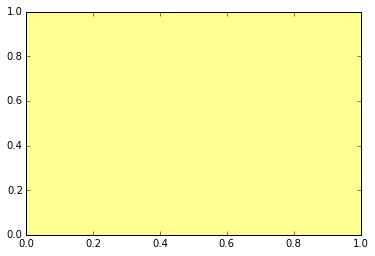

In [283]:
WAVS_O_I = [624.0924001269774,514.06587598080591, 456.44491156719874]

def color_maker(intensities, wavelengths):
    colors = []
    for W in WAVS_O_I:
        i = np.where(wavelengths==W)[0]
        sliced = intensities[i-WAVEBOXCAR:i+WAVEBOXCAR]
        colors.append(int(sliced.mean() * INTRGB_RATIO))
    return rgb2hex(colors)

color = color_maker(spec.intensities(), spec.wavelengths())
print(color)
show_color(color)